In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
OM4=xr.open_dataset('OM4.nc')
OM4CL=xr.open_dataset('OM4CL.nc')

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increas

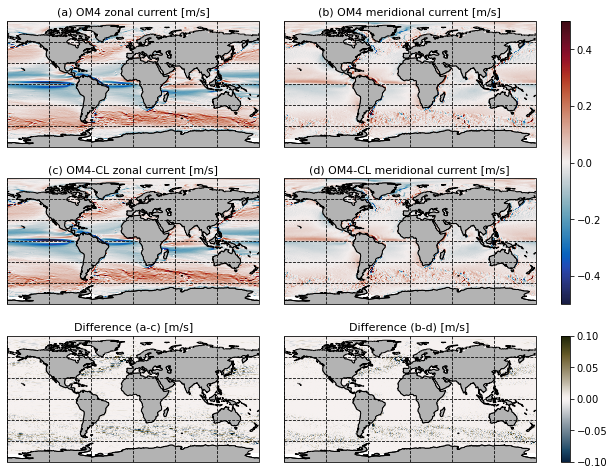

In [3]:
fig = plt.figure(figsize=(12,7))
D1=0.55;D2=0.25

ax1 = fig.add_axes([0.05,0.5+3*0.25/4,D1,D2], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.05,0.25+0.25/2,D1,D2], projection=ccrs.PlateCarree())
ax3 = fig.add_axes([0.05,0.25/4,D1,D2], projection=ccrs.PlateCarree())

ax4 = fig.add_axes([0.37,3*0.25/4+0.5,D1,D2], projection=ccrs.PlateCarree())
ax5 = fig.add_axes([0.37,2*0.25/4+0.25,D1,D2], projection=ccrs.PlateCarree())
ax6 = fig.add_axes([0.37,0.25/4,D1,D2], projection=ccrs.PlateCarree())

axcb1 = fig.add_axes([0.82,2*0.25/4+0.25,0.01,0.5625,])
axcb2 = fig.add_axes([0.82,0.25/4,0.01,0.25])


ax4.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax4.coastlines(resolution='auto', color='k')
ax4.gridlines(color='black', linestyle='--', )

ax5.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax5.coastlines(resolution='auto', color='k')
ax5.gridlines(color='black', linestyle='--', )

ax6.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax6.coastlines(resolution='auto', color='k')
ax6.gridlines(color='black', linestyle='--', )

ax1.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='auto', color='k')
ax1.gridlines(color='black', linestyle='--', )

ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='auto', color='k')
ax2.gridlines(color='black', linestyle='--', )

ax3.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax3.coastlines(resolution='auto', color='k')
ax3.gridlines(color='black', linestyle='--', )

AX=ax1
p=OM4.U.plot(x='geolon', y='geolat',
            vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
            transform=ccrs.PlateCarree(),
            add_labels=False,
            add_colorbar=False,
            ax=AX,
            facecolor="gray"
           )
AX.set_title('(a) OM4 zonal current [m/s]',fontsize=11)
cb = plt.colorbar(p, cax=axcb1,orientation='vertical')
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

AX=ax2
p=OM4CL.U.plot(x='geolon', y='geolat',
             vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('(c) OM4-CL zonal current [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

AX=ax3
p=(OM4.U-OM4CL.U).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.diff,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('Difference (a-c) [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, cax=axcb2,orientation='vertical')

AX=ax4
p=OM4.V.plot(x='geolon', y='geolat',
            vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
            transform=ccrs.PlateCarree(),
            add_labels=False,
            add_colorbar=False,
            ax=AX
           )
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
AX.set_title('(b) OM4 meridional current [m/s]',fontsize=11)

AX=ax5
p=OM4CL.V.plot(x='geolon', y='geolat',
             vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
AX.set_title('(d) OM4-CL meridional current [m/s]',fontsize=11)

AX=ax6
p=(OM4.V-OM4CL.V).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.diff,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
AX.set_title('Difference (b-d) [m/s]',fontsize=11)

fig.savefig('./figure_1.png',dpi=600,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


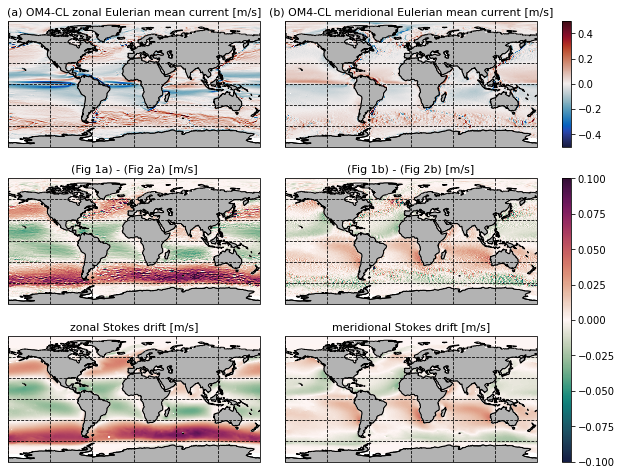

In [4]:
fig = plt.figure(figsize=(12,7))
D1=0.55;D2=0.25

ax1 = fig.add_axes([0.05,0.5+3*0.25/4,D1,D2], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.05,0.25+0.25/2,D1,D2], projection=ccrs.PlateCarree())
ax3 = fig.add_axes([0.05,0.25/4,D1,D2], projection=ccrs.PlateCarree())

ax4 = fig.add_axes([0.37,3*0.25/4+0.5,D1,D2], projection=ccrs.PlateCarree())
ax5 = fig.add_axes([0.37,2*0.25/4+0.25,D1,D2], projection=ccrs.PlateCarree())
ax6 = fig.add_axes([0.37,0.25/4,D1,D2], projection=ccrs.PlateCarree())

axcb1 = fig.add_axes([0.82,0.5+3*0.25/4,0.01,D2])
axcb2 = fig.add_axes([0.82,0.25/4,0.01,0.5625])

ax4.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax4.coastlines(resolution='auto', color='k')
ax4.gridlines(color='black', linestyle='--', )

ax5.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax5.coastlines(resolution='auto', color='k')
ax5.gridlines(color='black', linestyle='--', )

ax6.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax6.coastlines(resolution='auto', color='k')
ax6.gridlines(color='black', linestyle='--', )

ax1.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='auto', color='k')
ax1.gridlines(color='black', linestyle='--', )

ax2.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='auto', color='k')
ax2.gridlines(color='black', linestyle='--', )

ax3.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax3.coastlines(resolution='auto', color='k')
ax3.gridlines(color='black', linestyle='--', )



AX=ax1
p=OM4CL.Ue.plot(x='geolon', y='geolat',
            vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
            transform=ccrs.PlateCarree(),
            add_labels=False,
            add_colorbar=False,
            ax=AX
           )
AX.set_title('(a) OM4-CL zonal Eulerian mean current [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, cax=axcb1,orientation='vertical')

AX=ax2
p=(OM4.U-OM4CL.Ue).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.curl,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('(Fig 1a) - (Fig 2a) [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

AX=ax3
p=(OM4CL.Us).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.curl,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('zonal Stokes drift [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, cax=axcb2,orientation='vertical')

AX=ax4
p=OM4CL.Ve.plot(x='geolon', y='geolat',
            vmin=-0.5,vmax=0.5,cmap=cmocean.cm.balance,
            transform=ccrs.PlateCarree(),
            add_labels=False,
            add_colorbar=False,
            ax=AX
           )
AX.set_title('(b) OM4-CL meridional Eulerian mean current [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

AX=ax5
p=(OM4.V-OM4CL.Ve).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.curl,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('(Fig 1b) - (Fig 2b) [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

AX=ax6
p=(OM4CL.Vs).plot(x='geolon', y='geolat',
             vmin=-0.1,vmax=0.1,cmap=cmocean.cm.curl,
             transform=ccrs.PlateCarree(),
             add_labels=False,
             add_colorbar=False,
             ax=AX
            )
AX.set_title('meridional Stokes drift [m/s]',fontsize=11)
AX.add_feature(cfeature.LAND, facecolor='0.7')
AX.add_feature(cfeature.COASTLINE)

fig.savefig('./figure_2.png',dpi=600,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0.02)